In [25]:
!pip install watermark

In [26]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import watermark

%matplotlib inline
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [27]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.120+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

numpy     : 1.23.5
pandas    : 1.5.3
matplotlib: 3.7.1
watermark : 2.4.3



# Очистка данных, приведение в рабочее состояние

## GDP

In [28]:
GDP = pd.read_excel('GDP.xlsx')
GDP['date'] = pd.to_datetime(GDP['date'], format='%d-%m-%Y')
# Удаление ненужных колонок
GDP = GDP[['date', 'Nominal GDP Index', 'Real GDP Index']]
GDP.head()

,date,Nominal GDP Index,Real GDP Index
0,2020-01-01,22015.312813,20959.675271
1,2020-02-01,22119.357184,21057.624317
2,2020-03-01,20984.869002,19980.245161
3,2020-04-01,18943.037407,18153.868201
4,2020-05-01,19820.181691,18962.320501


## CPI

In [29]:
CPI = pd.read_csv('cpi.csv', sep='"', decimal=',')
CPI = CPI['date, "value"'].str.split(',', expand=True)
CPI.head()

,0,1,2
0,10.2023,"""3","7%"""
1,09.2023,"""3","7%"""
2,08.2023,"""3","7%"""
3,07.2023,"""3","2%"""
4,06.2023,"""3","0%"""


In [30]:
CPI['date'] = pd.to_datetime(CPI[0], format='%m.%Y')

# Создание новой колонки 'value' из цифр первой и второй колонок
CPI[1] = CPI[1].str.replace('"', '').astype('float')
CPI[2] = CPI[2].str.replace('"', '')
CPI[2] = CPI[2].str.rstrip('%').astype('float')
CPI['value'] = (CPI[1] + CPI[2]/10)
# Удаление ненужных колонок
CPI = CPI[['date', 'value']]

CPI.head()


,date,value
0,2023-10-01,3.7
1,2023-09-01,3.7
2,2023-08-01,3.7
3,2023-07-01,3.2
4,2023-06-01,3.0


## Rate Desicion

In [31]:
RD = pd.read_csv('rate_desicion.csv', sep='"', decimal=',')
RD = RD['date, "value"'].str.split(',', expand=True)
RD.head()

,0,1,2
0,10.2023,"""5","50%"""
1,09.2023,"""5","50%"""
2,08.2023,"""5","50%"""
3,07.2023,"""5","50%"""
4,06.2023,"""5","25%"""


In [32]:
RD['date'] = pd.to_datetime(RD[0], format='%m.%Y')

# Создание новой колонки 'value' из цифр первой и второй колонок
RD[1] = RD[1].str.replace('"', '').astype('float')
RD[2] = RD[2].str.replace('"', '')
RD[2] = RD[2].str.rstrip('%').astype('float')
RD['value'] = (RD[1] + RD[2]/100)
# Удаление ненужных колонок
RD = RD[['date', 'value']]

RD.head()


,date,value
0,2023-10-01,5.50
1,2023-09-01,5.50
2,2023-08-01,5.50
3,2023-07-01,5.50
4,2023-06-01,5.25


## Unemployment

In [33]:
UnEm = pd.read_csv('unemployment.csv', sep='"', decimal=',')
# Убираем кавычки вокруг столбца "value" и преобразуем его в числовой формат
UnEm = UnEm['date, "value"'].str.split(',', expand=True)
UnEm.head()

,0,1,2
0,10.2023,"""3","9%"""
1,09.2023,"""3","8%"""
2,08.2023,"""3","8%"""
3,07.2023,"""3","5%"""
4,06.2023,"""3","6%"""


In [34]:
UnEm['date'] = pd.to_datetime(UnEm[0], format='%m.%Y')

# Создание новой колонки 'value' из цифр первой и второй колонок
UnEm[1] = UnEm[1].str.replace('"', '').astype('float')
UnEm[2] = UnEm[2].str.replace('"', '')
UnEm[2] = UnEm[2].str.rstrip('%').astype('float')
UnEm['value'] = (UnEm[1] + UnEm[2]/10)
# Удаление ненужных колонок
UnEm = UnEm[['date', 'value']]

UnEm.head()


,date,value
0,2023-10-01,3.9
1,2023-09-01,3.8
2,2023-08-01,3.8
3,2023-07-01,3.5
4,2023-06-01,3.6


## Bank of America

In [35]:
BAC = pd.read_csv('BAC.csv', sep='"', decimal=',')
columns_names = list(BAC.columns.values)
print(columns_names)
BAC.head()

['Дата,', 'Цена', ',', 'Откр.', ',.1', 'Макс.', ',.2', 'Мин.', ',.3', 'Объём', ',.4', 'Изм. %', 'Unnamed: 12']


,"Дата,",Цена,",",Откр.,",.1",Макс.,",.2",Мин.,",.3",Объём,",.4",Изм. %,Unnamed: 12
0,"31.10.2023,",26.34,",",25.74,",",26.38,",",25.72,",","49,57M",",","2,53%",NaN
1,"30.10.2023,",25.69,",",25.32,",",25.78,",",25.28,",","41,22M",",","2,07%",NaN
2,"27.10.2023,",25.17,",",26.07,",",26.07,",",24.96,",","64,71M",",","-3,64%",NaN
3,"26.10.2023,",26.12,",",25.49,",",26.36,",",25.44,",","60,32M",",","2,23%",NaN
4,"25.10.2023,",25.55,",",25.38,",",25.65,",",25.18,",","45,16M",",","0,31%",NaN


In [36]:
# Приводим "date" в нормальный вид
BAC['date'] = BAC[columns_names[0]].str.replace(',', '')
BAC['date'] = pd.to_datetime(BAC['date'].str.strip(), format='%d.%m.%Y')
BAC.head()

,"Дата,",Цена,",",Откр.,",.1",Макс.,",.2",Мин.,",.3",Объём,",.4",Изм. %,Unnamed: 12,date
0,"31.10.2023,",26.34,",",25.74,",",26.38,",",25.72,",","49,57M",",","2,53%",NaN,2023-10-31
1,"30.10.2023,",25.69,",",25.32,",",25.78,",",25.28,",","41,22M",",","2,07%",NaN,2023-10-30
2,"27.10.2023,",25.17,",",26.07,",",26.07,",",24.96,",","64,71M",",","-3,64%",NaN,2023-10-27
3,"26.10.2023,",26.12,",",25.49,",",26.36,",",25.44,",","60,32M",",","2,23%",NaN,2023-10-26
4,"25.10.2023,",25.55,",",25.38,",",25.65,",",25.18,",","45,16M",",","0,31%",NaN,2023-10-25


In [37]:
BAC = BAC.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
BAC = BAC.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

BAC['Volume'] = BAC['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
BAC['Changes(%)'] = BAC['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
BAC.head()

,Close,Open,Max,Min,Volume,Changes(%),date
0,26.34,25.74,26.38,25.72,4957.0,2.53,2023-10-31
1,25.69,25.32,25.78,25.28,4122.0,2.07,2023-10-30
2,25.17,26.07,26.07,24.96,6471.0,-3.64,2023-10-27
3,26.12,25.49,26.36,25.44,6032.0,2.23,2023-10-26
4,25.55,25.38,25.65,25.18,4516.0,0.31,2023-10-25


In [38]:
BAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Close       965 non-null    float64       
 1   Open        965 non-null    float64       
 2   Max         965 non-null    float64       
 3   Min         965 non-null    float64       
 4   Volume      965 non-null    float64       
 5   Changes(%)  965 non-null    float64       
 6   date        965 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 52.9 KB


## Citi

In [39]:
Citi = pd.read_csv('C.csv', sep='"', decimal=',')
columns_names = list(Citi.columns.values)


# дату в нормальный вид
Citi['date'] = Citi[columns_names[0]].str.replace(',', '')
Citi['date'] = pd.to_datetime(Citi['date'].str.strip(), format='%d.%m.%Y')

# удаляем мусор
Citi = Citi.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
Citi = Citi.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

Citi['Volume'] = Citi['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
Citi['Changes(%)'] = Citi['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
Citi.head()

,Close,Open,Max,Min,Volume,Changes(%),date
0,39.49,39.04,39.53,38.92,1627.0,1.44,2023-10-31
1,38.93,38.55,38.97,38.41,2065.0,1.80,2023-10-30
2,38.24,39.33,39.37,38.17,2065.0,-2.80,2023-10-27
3,39.34,38.50,39.75,38.47,2492.0,1.89,2023-10-26
4,38.61,38.70,38.85,38.26,1508.0,-0.82,2023-10-25


## JPM

In [40]:
JPM = pd.read_csv('JPM.csv', sep='"', decimal=',')
columns_names = list(JPM.columns.values)


# дату в нормальный вид
JPM['date'] = JPM[columns_names[0]].str.replace(',', '')
JPM['date'] = pd.to_datetime(JPM['date'].str.strip(), format='%d.%m.%Y')

# удаляем мусор
JPM = JPM.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
JPM = JPM.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

JPM['Volume'] = JPM['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
JPM['Changes(%)'] = JPM['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
JPM.head()

,Close,Open,Max,Min,Volume,Changes(%),date
0,139.06,137.71,139.24,137.47,902.0,1.19,2023-10-31
1,137.42,136.44,138.04,136.04,882.0,1.27,2023-10-30
2,135.69,138.95,139.10,135.19,1743.0,-3.60,2023-10-27
3,140.76,139.76,141.66,139.43,900.0,0.26,2023-10-26
4,140.40,140.57,141.18,139.51,732.0,-0.55,2023-10-25


## WFC

In [41]:
WFC = pd.read_csv('WFC.csv', sep='"', decimal=',')
columns_names = list(WFC.columns.values)


# дату в нормальный вид
WFC['date'] = WFC[columns_names[0]].str.replace(',', '')
WFC['date'] = pd.to_datetime(WFC['date'].str.strip(), format='%d.%m.%Y')

# удаляем мусор
WFC = WFC.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
WFC = WFC.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

WFC['Volume'] = WFC['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
WFC['Changes(%)'] = WFC['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
WFC.head()

,Close,Open,Max,Min,Volume,Changes(%),date
0,39.77,39.64,39.81,39.24,1075.0,0.86,2023-10-31
1,39.43,39.10,39.59,38.69,1168.0,1.73,2023-10-30
2,38.76,39.38,39.41,38.62,1358.0,-2.24,2023-10-27
3,39.65,39.02,39.97,38.98,1436.0,1.59,2023-10-26
4,39.03,39.07,39.21,38.58,1383.0,-0.64,2023-10-25


#  EDA

## GDP

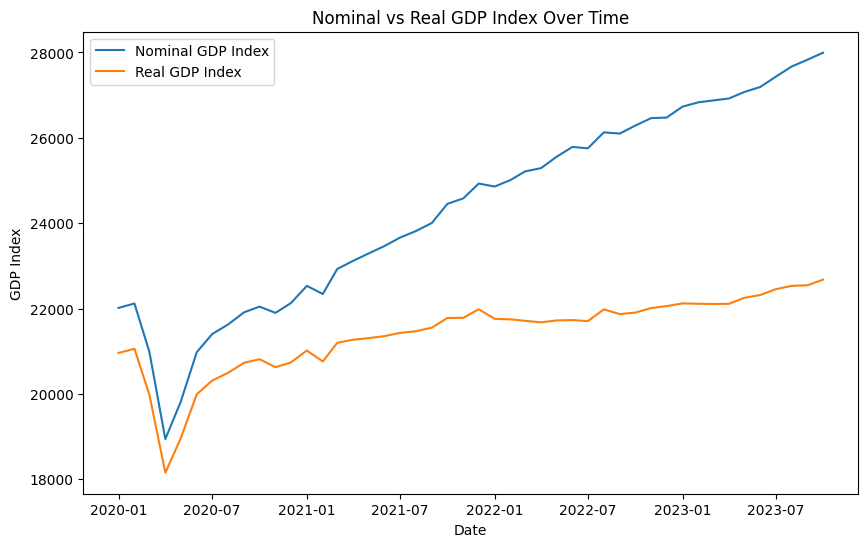

In [42]:
plt.figure(figsize=(10, 6))

# Построение графика для Nominal GDP Index
plt.plot(GDP['date'], GDP['Nominal GDP Index'], label='Nominal GDP Index')

# Построение графика для Real GDP Index
plt.plot(GDP['date'], GDP['Real GDP Index'], label='Real GDP Index')

# Добавление заголовка и подписей осей
plt.title('Nominal vs Real GDP Index Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Index')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

Возможно, имеет смысл объединить датафреймы, содержащие макроэкономические данные (однако стоит отметить тот факт, что данные выходят в разные дни и необходимо отразить изменения в датафрейме)

In [43]:
!pip install mpl_finance

необходимо учесть див отсечки (возможно)

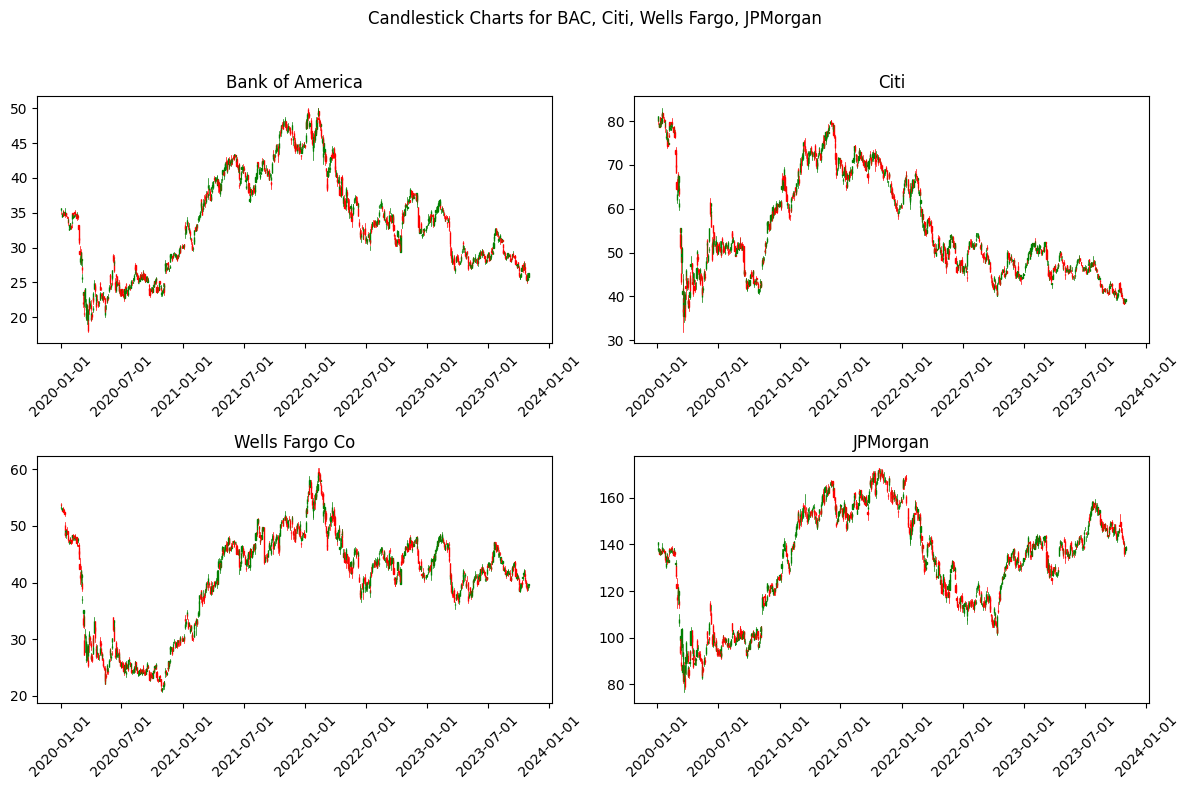

In [48]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

# График для Banc of America

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# График для BAC
axs[0, 0].set_title('Bank of America')
candlestick_ohlc(axs[0, 0], zip(mdates.date2num(BAC['date']), BAC['Open'], BAC['Max'], BAC['Min'], BAC['Close']), width=0.6, colorup='g', colordown='r')

# График для Citi
axs[0, 1].set_title('Citi')
candlestick_ohlc(axs[0, 1], zip(mdates.date2num(Citi['date']), Citi['Open'], Citi['Max'], Citi['Min'], Citi['Close']), width=0.6, colorup='g', colordown='r')

# График для Wells Fargo
axs[1, 0].set_title('Wells Fargo Co')
candlestick_ohlc(axs[1, 0], zip(mdates.date2num(WFC['date']), WFC['Open'], WFC['Max'], WFC['Min'], WFC['Close']), width=0.6, colorup='g', colordown='r')

# График для JPMorgan
axs[1, 1].set_title('JPMorgan')
candlestick_ohlc(axs[1, 1], zip(mdates.date2num(JPM['date']), JPM['Open'], JPM['Max'], JPM['Min'], JPM['Close']), width=0.6, colorup='g', colordown='r')

# Добавим форматирование осей дат
for ax in axs.flat:
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Добавим общий заголовок
plt.suptitle('Candlestick Charts for BAC, Citi, Wells Fargo, JPMorgan')

# Регулировка расстояния между графиками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Отображение графиков
plt.show()

матрица корреляций

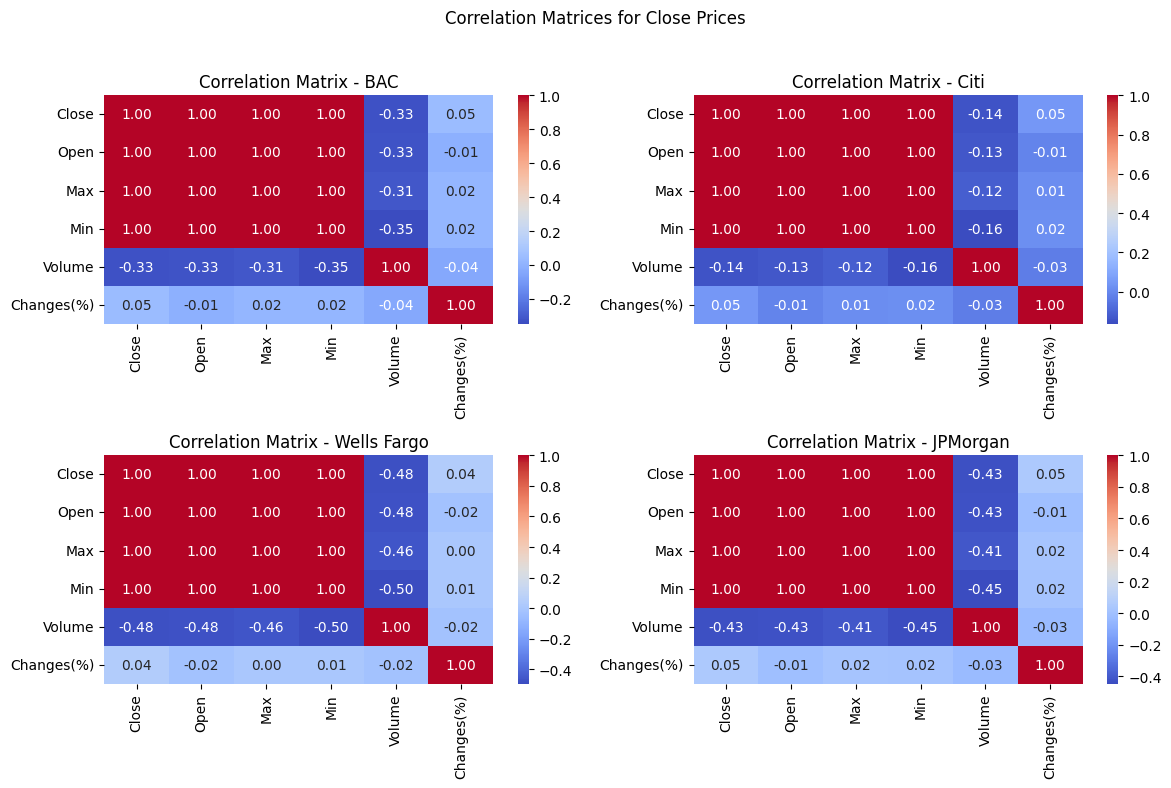

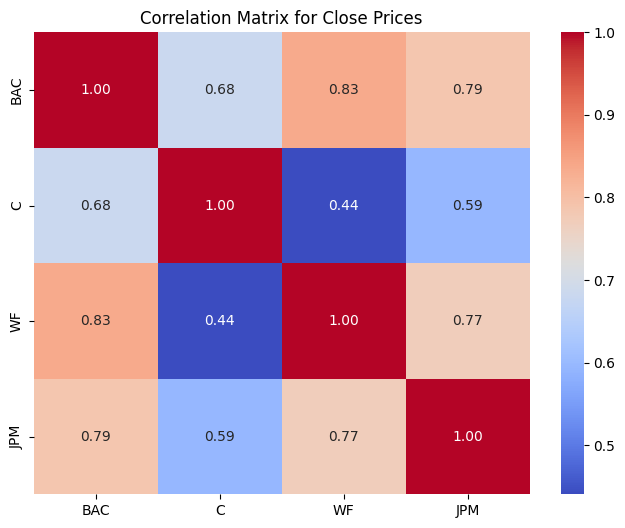

In [49]:
import seaborn as sns

# Создадим матрицу корреляции цен закрытия для каждого датафрейма
corr_BAC = BAC[['Close', 'Open', 'Max', 'Min', 'Volume', 'Changes(%)']].corr()
corr_Citi = Citi[['Close', 'Open', 'Max', 'Min', 'Volume', 'Changes(%)']].corr()
corr_WFC = WFC[['Close', 'Open', 'Max', 'Min', 'Volume', 'Changes(%)']].corr()
corr_JPM = JPM[['Close', 'Open', 'Max', 'Min', 'Volume', 'Changes(%)']].corr()

# Создадим матрицу корреляции между целевыми переменными (ценами закрытия) каждого датафрейма
corr_close = pd.concat([BAC['Close'], Citi['Close'], WFC['Close'], JPM['Close']], axis=1)
corr_close.columns = ['BAC', 'C', 'WF', 'JPM']
corr_close_matrix = corr_close.corr()

# Построим тепловые карты
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Тепловая карта для BAC
sns.heatmap(corr_BAC, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[0, 0])
axs[0, 0].set_title('Correlation Matrix - BAC')

# Тепловая карта для Citi
sns.heatmap(corr_Citi, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[0, 1])
axs[0, 1].set_title('Correlation Matrix - Citi')

# Тепловая карта для Wells Fargo
sns.heatmap(corr_WFC, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[1, 0])
axs[1, 0].set_title('Correlation Matrix - Wells Fargo')

# Тепловая карта для JPMorgan
sns.heatmap(corr_JPM, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[1, 1])
axs[1, 1].set_title('Correlation Matrix - JPMorgan')

# Добавим общий заголовок
plt.suptitle('Correlation Matrices for Close Prices')

# Регулировка расстояния между графиками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Отображение графиков
plt.show()

# Тепловая карта для корреляции между ценами закрытия
plt.figure(figsize=(8, 6))
sns.heatmap(corr_close_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Close Prices')
plt.show()

Мне кажется лучше спреды посчитать между показателями и вывести графики (для анализа внутри каждого датафрейма с акциями)

<ipython-input-52-0e6f652d9c07>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_data.corr()


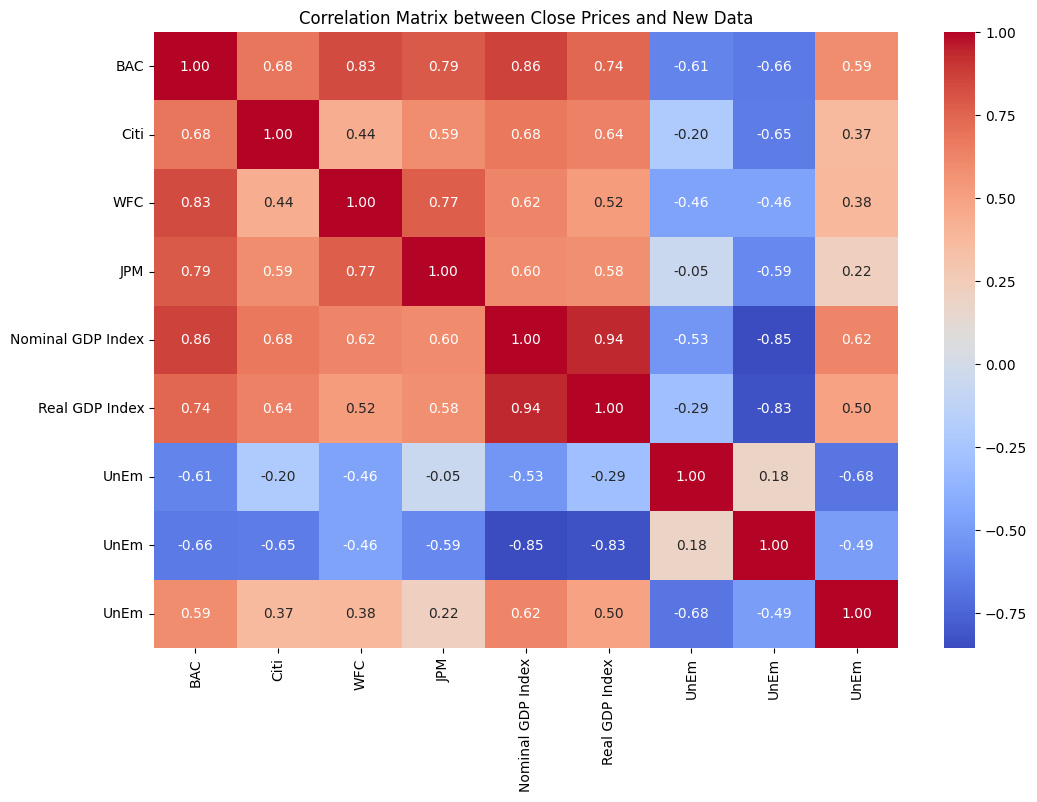

In [52]:
close_data = pd.concat([BAC['Close'], Citi['Close'], WFC['Close'], JPM['Close']], axis=1)
close_data.columns = ['BAC', 'Citi', 'WFC', 'JPM']

# Объединим новые данные
new_data = pd.concat([GDP, CPI, RD, UnEm], axis=1)

# Объединим оба датафрейма в один
merged_data = pd.concat([close_data, new_data], axis=1)
merged_data.rename(columns={'value': 'CPI', 'value': 'RD', 'value': 'UnEm'}, inplace=True)

# Построим матрицу корреляции
corr_matrix = merged_data.corr()

# Построим тепловую карту
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Close Prices and New Data')
plt.show()